In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
import os

from tqdm import tqdm

in_root = "../../data/plot/insitu_metrics"
out_root = "../../data/plot/insitu_metrics.csv"

lst = []
for file in tqdm(os.listdir(in_root)):
    df = pd.read_csv(os.path.join(in_root, file))
    exp, split_method, layer = file.split("_")
    layer = layer.split(".")[0]
    df["exp"] = exp
    df["split_method"] = split_method
    df["layer"] = layer
    lst.append(df)

df_output = pd.concat(lst, axis=0, ignore_index=True)

df_output.to_csv(out_root, index=False)

In [ ]:
# publish
df = pd.read_csv("../../data/plot/insitu_metrics.csv")
df.rename(columns={
    "rmse": r"RMSE[$m^3/m^3$]", 
    "r": "R", # --> R
    "ubrmse": r"ubRMSE[$m^3/m^3$]", 
    "count": "Sample Size"
}, inplace=True)
df["exp"] = df["exp"].map({
    "rf": "RF", 
    "automl": "FLAML", # change AutoML to FLAML
    "smci": "SMCI1.0_9km", 
    "gldas": "GLDAS-2.1", 
    "era5": "ERA5-Land"
})

df.to_csv("../../data/plot/insitu_metrics_pb.csv", index=False)

In [ ]:
import numpy as np

import os
import sys
sys.path.append("../../")

from config.config import Config

opt = Config()
layers = opt.layers

# publish
insitu_metrics = pd.read_csv("../../data/plot/insitu_metrics_pb.csv")

# publish
save_root = "../../data/plot/insitu_metrics_pb_print"
os.makedirs(save_root, exist_ok=True)

# factor
factor = 1.3

for l in range(1, 6):
    if l == 1:
        fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    else:
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # change fontsize
    # plt.rcParams["font.size"] = plt.rcParams["font.size"] * factor
    

    df = insitu_metrics[(insitu_metrics["layer"] == f"layer{l}")].copy()
    df.dropna(axis=0, inplace=True, how="any")

    axes = axes.ravel()

    # metric_cols = [r"RMSE[$m^3/m^3$]","Pearson Correlation",r"ubRMSE[$m^3/m^3$]","Sample Size"]
    metric_cols = [r"ubRMSE[$m^3/m^3$]", r"RMSE[$m^3/m^3$]", "R", "Sample Size"]
    
    fig.suptitle(f"Layer {l}", fontsize=12 * factor)
    for i, (ax, col) in enumerate(zip(axes, metric_cols)):
        # change fontsize
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + 
            ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(item.get_fontsize() * factor)
        sns.boxplot(data=df, x="exp", y=col, hue="split_method", ax=ax)
        if i != 3:
            ax.get_legend().remove()
        
        base_spatial = np.median(df[(df["exp"] == "FLAML") & (df["split_method"] == "spatial")][col].values) # AutoML --> FLAML
        base_temporal = np.median(df[(df["exp"] == "FLAML") & (df["split_method"] == "temporal")][col].values) # AutoML --> FLAML

        ax.axhline(base_spatial, dashes=(2, 2), color="red")
        ax.axhline(base_temporal, dashes=(2, 2), color="blue")
        ax.grid(linestyle="dotted")

        ax.set_xlabel("")

    plt.tight_layout()

    plt.savefig(os.path.join(save_root, f"layer{l}.pdf"))

In [24]:
df = pd.read_csv("../../data/plot/metrics.csv")

df.rename(columns={
    "r2_total": r"$R^2$", 
    "r_total": "R", # --> R
    "rmse_total": r"RMSE[$m^3/m^3$]", 
    "ubrmse_total": r"ubRMSE[$m^3/m^3$]"
}, inplace=True)

df["exp"] = df["exp"].map({
    "ERA5": "ERA5-Land", 
    "GLDAS": "GLDAS-2.1", 
    'SMCI': "SMCI1.0_9km", 
    "RF": "RF", 
    "AutoML": "FLAML"
})

df.to_csv("../../data/plot/metrics_pb.csv", index=False)

100%|██████████| 5/5 [00:10<00:00,  2.01s/it]


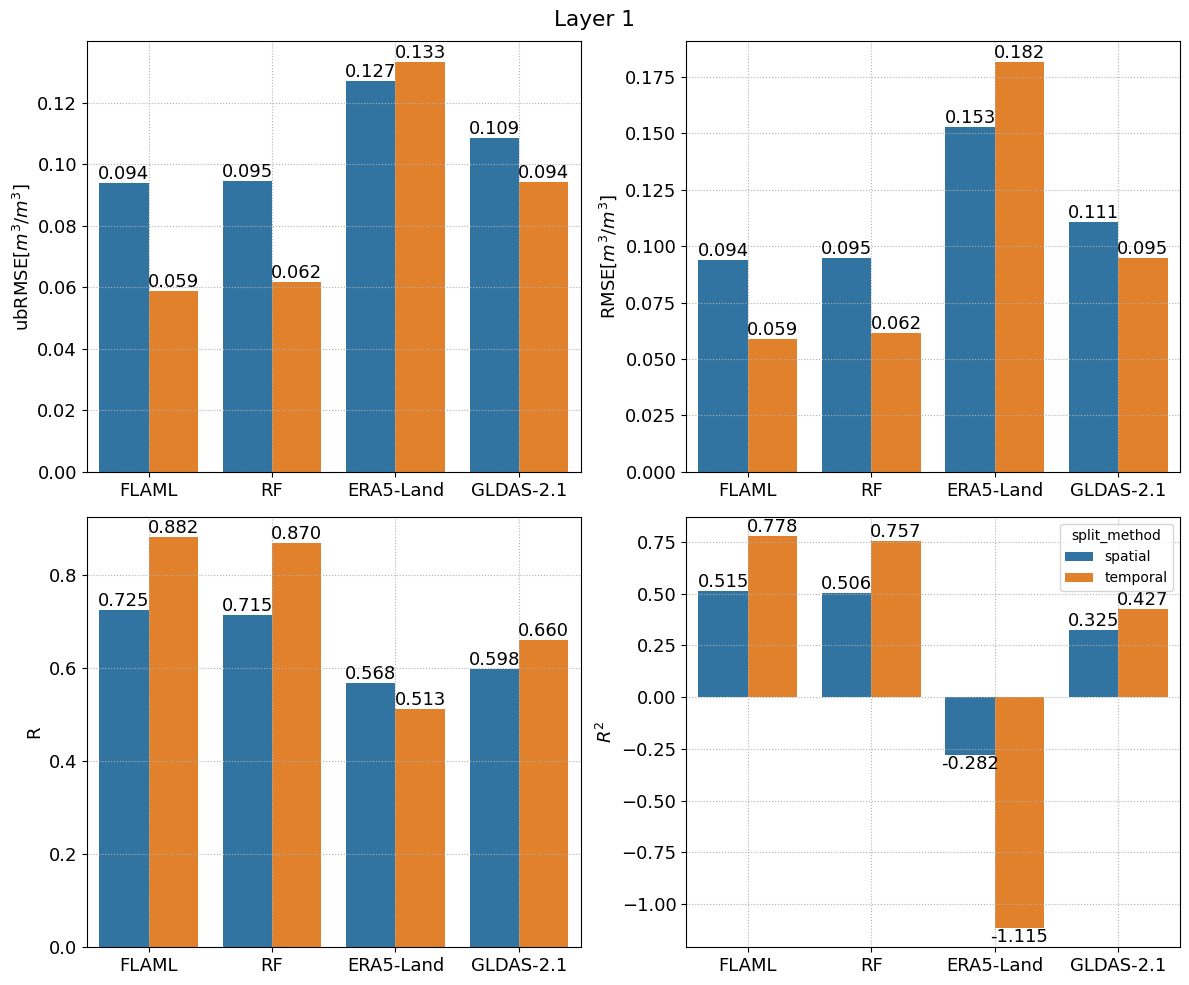

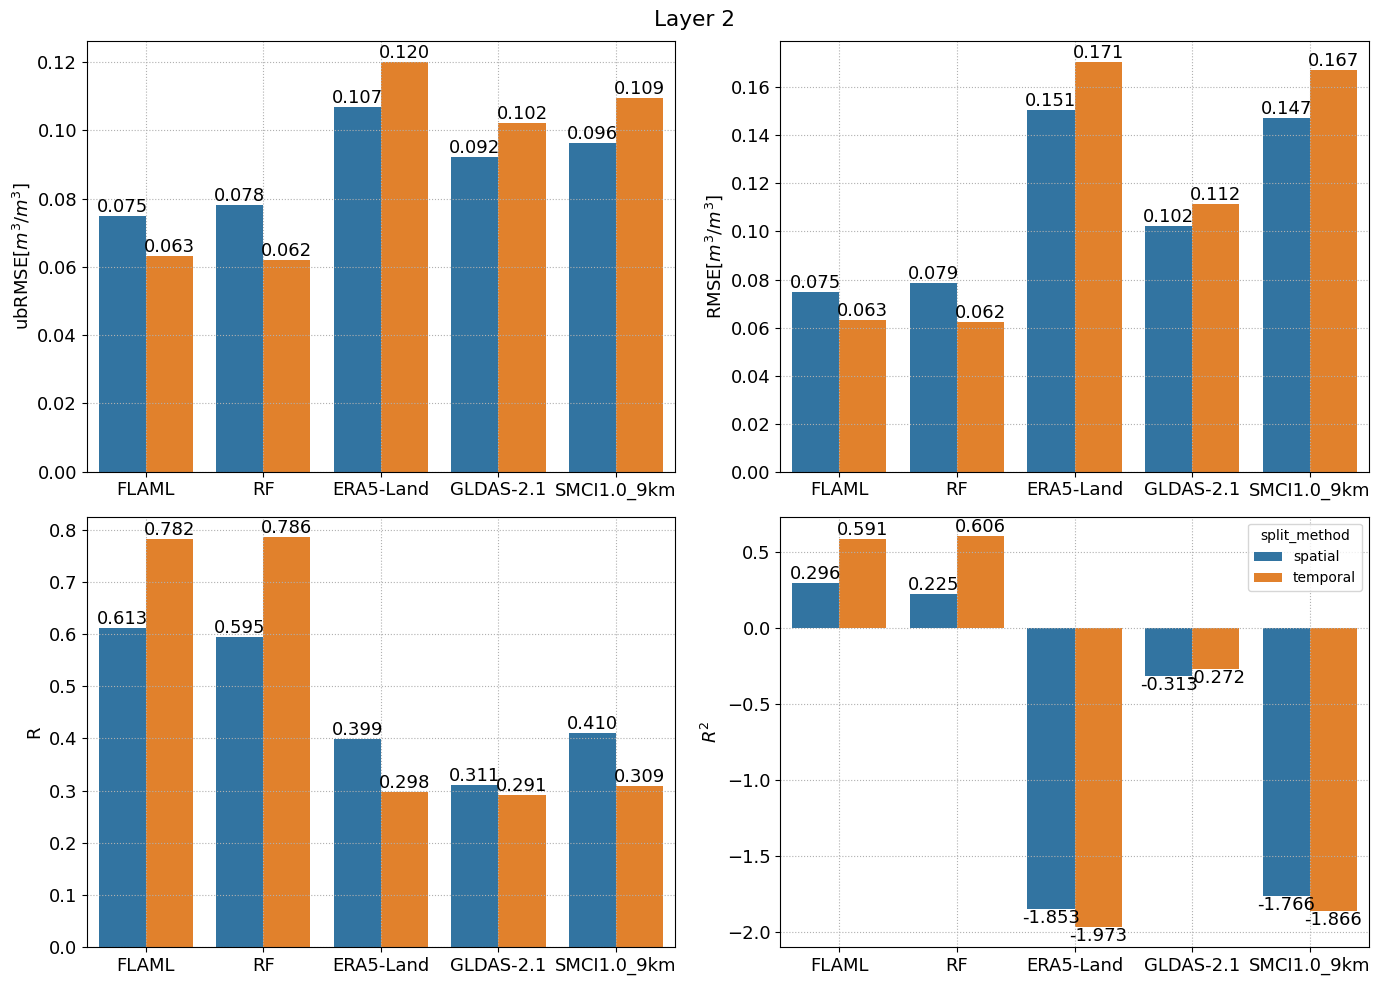

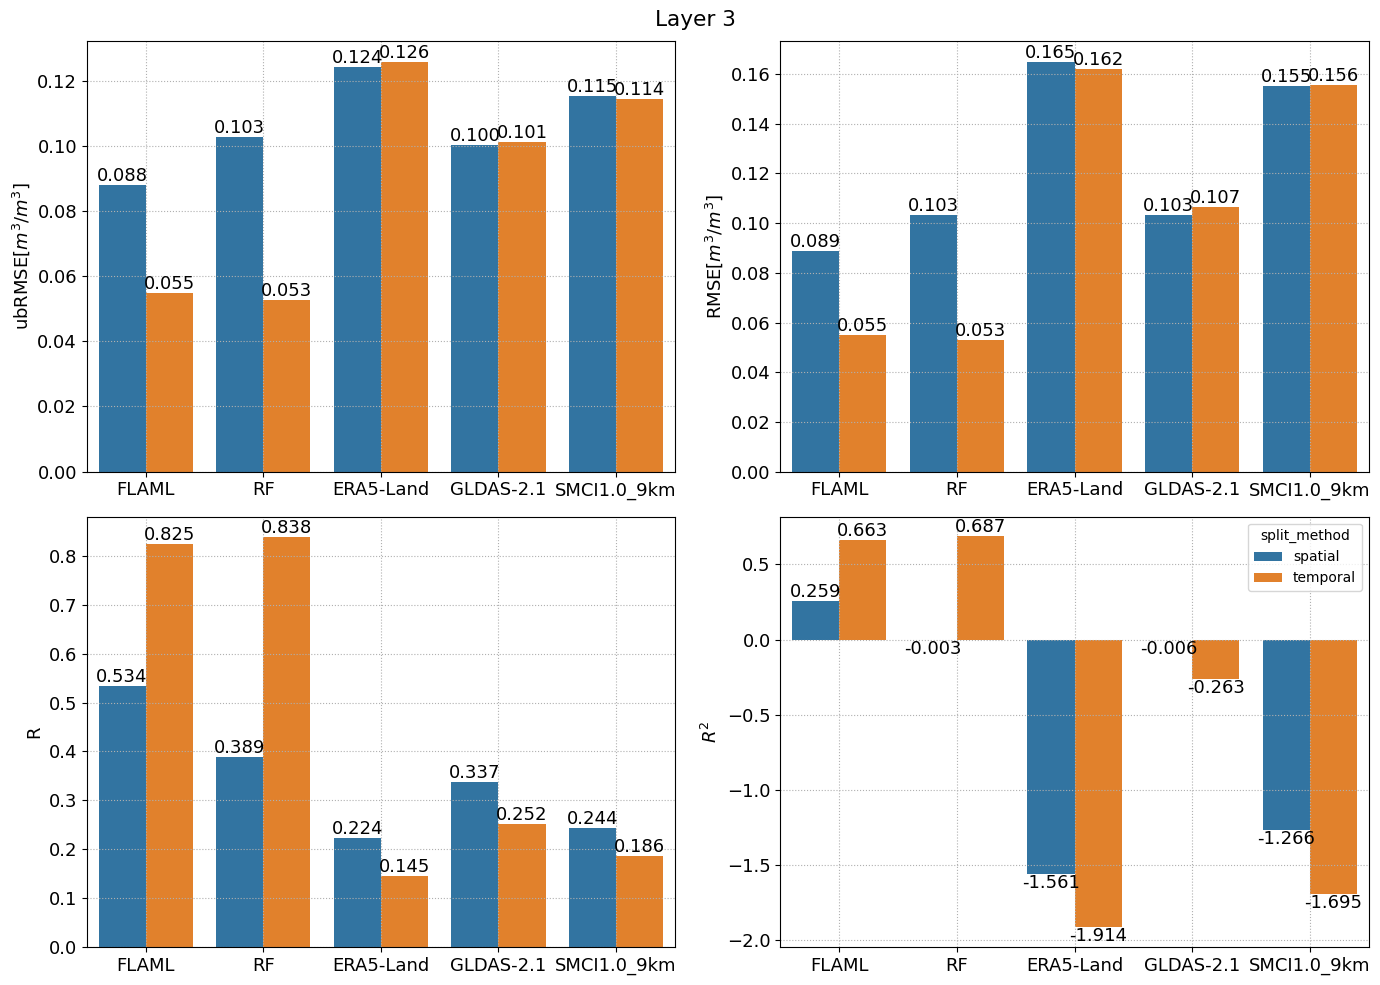

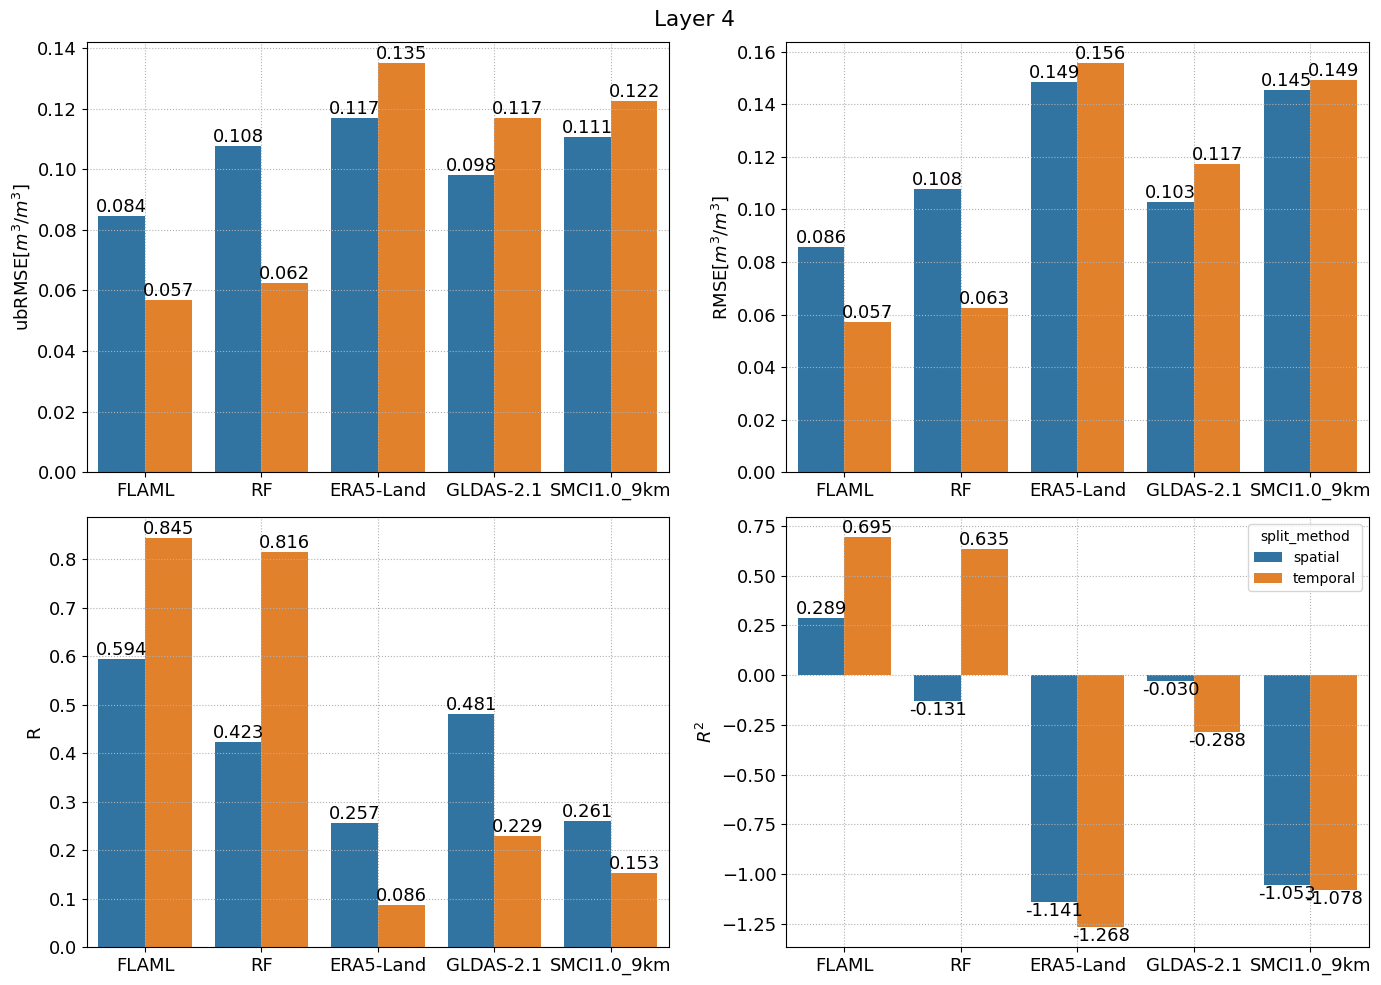

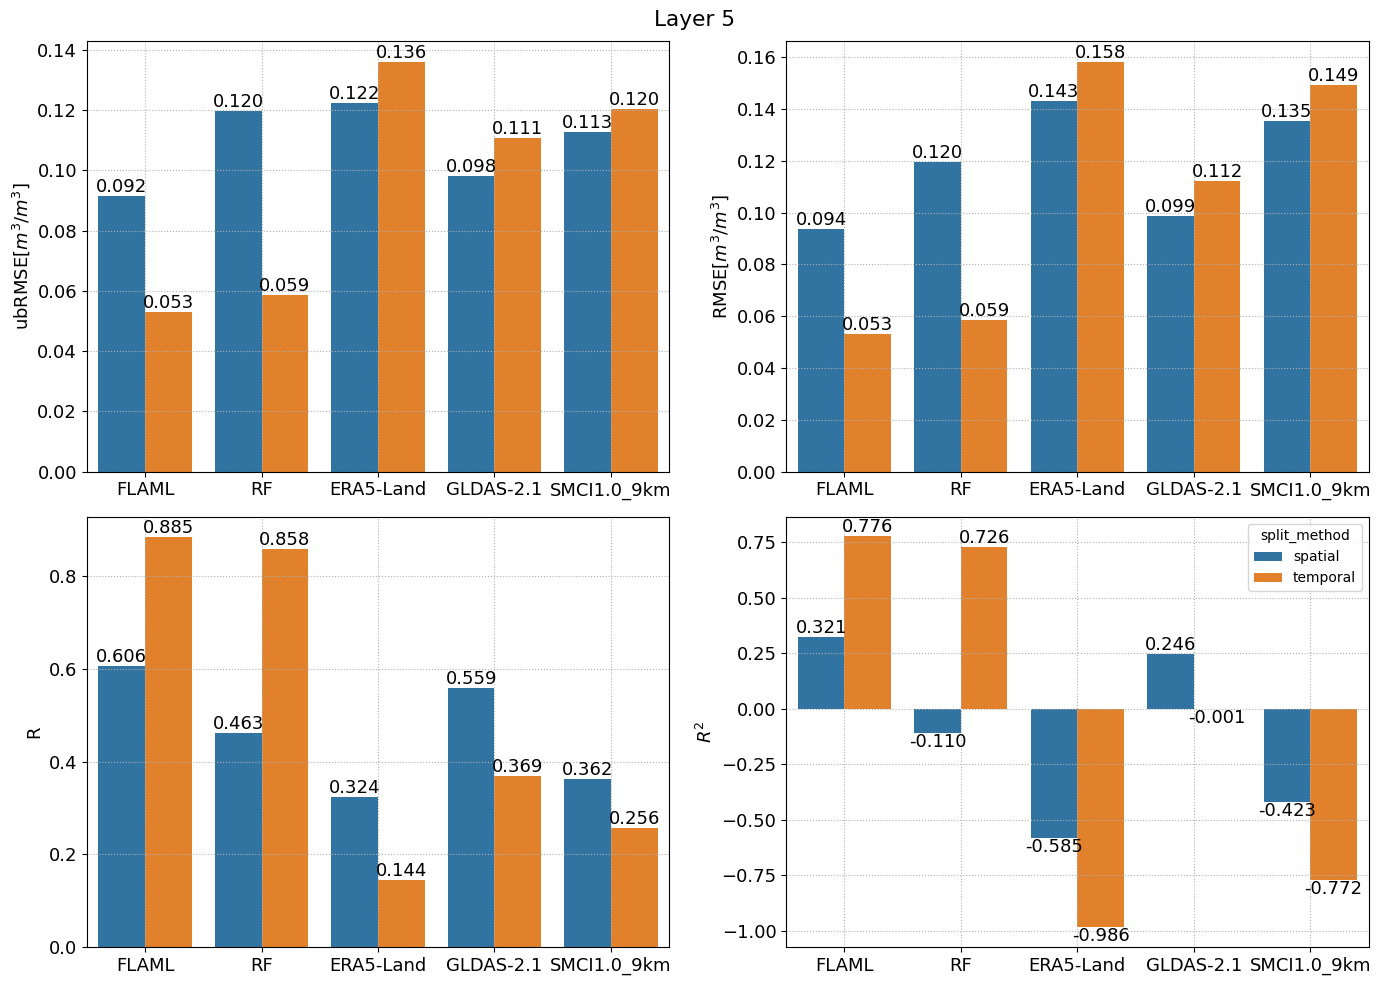

In [32]:
import os
import numpy as np
from tqdm import tqdm

metrics = pd.read_csv("../../data/plot/metrics_pb.csv")

save_root = "../../data/plot/metrics_pb_print"
os.makedirs(save_root, exist_ok=True)

# change font size
factor = 1.3

for l in tqdm(range(1, 6)):
    if l == 1:
        fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    else:
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    df = metrics[metrics["layer"] == f"layer{l}"]
    
    axes = axes.ravel()

    # metric_cols = [r"$R^2$","Pearson Correlation",r"RMSE[$m^3/m^3$]",r"ubRMSE[$m^3/m^3$]"]
    metric_cols = [r"ubRMSE[$m^3/m^3$]", r"RMSE[$m^3/m^3$]", "R", r"$R^2$"]

    fig.suptitle(f"Layer {l}", fontsize=12 * factor)
    for i, (ax, col) in enumerate(zip(axes, metric_cols)):
        # change fontsize
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + 
            ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(item.get_fontsize() * factor)
        sns.barplot(data=df, x="exp", y=col, hue="split_method", ax=ax)
        ax.bar_label(ax.containers[0], fontsize=10 * factor, fmt="%.3f")
        ax.bar_label(ax.containers[1], fontsize=10 * factor, fmt="%.3f")
        if i != 3:
            ax.get_legend().remove()

        ax.grid(linestyle="dotted")

        ax.set_xlabel("")
    
    plt.tight_layout()
    
    plt.savefig(os.path.join(save_root, f"layer{l}.pdf"))

In [ ]:
df = pd.read_csv("../../data/plot/insitu_metrics_pb.csv")
df.dropna(axis=0, how="any", inplace=True, ignore_index=True)
df = df.groupby(["layer", "split_method", "exp"]).median().reset_index()

df.to_csv("../../data/plot/insitu_metrics_median.csv", index=False)